# Data Preprocessing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In supervised learning problems, we need to extract features from each item in training data as well as possibly cleaning up data and filling in missing values.

---

## Categorical Features

The problem below is the categorical data (neighborhood) cannot be converted to an int, despite the need for numerical values in our algorithm.

In [4]:
data = [{'price':850000,'rooms':4,'neighborhood':'airport'},
        {'price':1000000,'rooms':3,'neighborhood':'downtown'},
        {'price':2000000,'rooms':5,'neighborhood':'Foothill'}]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
result = vec.fit_transform(data)
print(vec.get_feature_names()) # gives feature info
df = pd.DataFrame(result,columns=vec.get_feature_names())
df

['neighborhood=Foothill', 'neighborhood=airport', 'neighborhood=downtown', 'price', 'rooms']


,neighborhood=Foothill,neighborhood=airport,neighborhood=downtown,price,rooms
0,0,1,0,850000,4
1,0,0,1,1000000,3
2,1,0,0,2000000,5


## Text Features

In [6]:
sample = ['problem of evil','evil queen','horizon problem']

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer() # auto extracts the word frequencies, makes TF-IDF easier
X = vec.fit_transform(sample)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


### TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
df

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Features

The input data cannot be modeled well with the current model

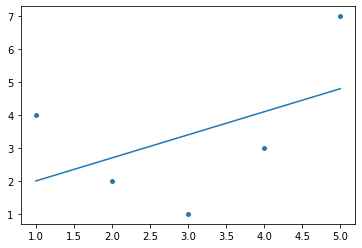

In [15]:
%matplotlib inline

from sklearn import linear_model
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
X = x[:,np.newaxis]
model = linear_model.LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y,s=15)
plt.plot(x,yfit);

For this dataset, try using a polynomial basis to help

[[1]
 [2]
 [3]
 [4]
 [5]]
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


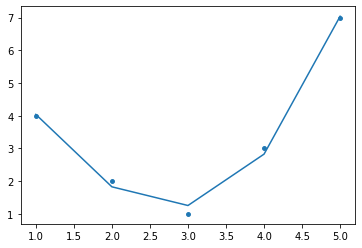

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X = x[:,np.newaxis]
X2 = poly.fit_transform(X)
print(X)
print(X2)
model = linear_model.LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(x,y,s=15)
plt.plot(x,yfit);

## Imputation of Missing Data

This fills in the missing values with the mean of the column, can also use median or mode

In [20]:
X = np.array([[np.nan,0,3],
                [3,7,9],
                [2,np.nan,5]])
print(X)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
print(X2)

[[nan  0.  3.]
 [ 3.  7.  9.]
 [ 2. nan  5.]]
[[2.5 0.  3. ]
 [3.  7.  9. ]
 [2.  3.5 5. ]]


## Feature Pipelines

1. Impute missing values using mean
2. Transform features to quadratic
3. Fit a linear regression

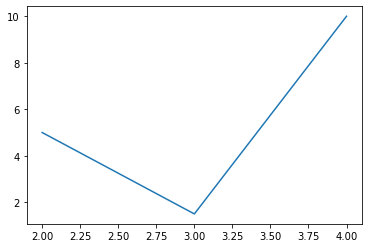

In [26]:
x = np.array([np.nan,2,3,4])
y = np.array([2,5,1,10])
X = x[:,np.newaxis]
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                        PolynomialFeatures(degree=4),
                        linear_model.LinearRegression())
model.fit(X,y)
yfit = model.predict(X)
plt.plot(x,yfit);

### Hyperparameters

In the case of the above example, degree is a hyperparameter. The higher the degree, the more accurate the model is, but if the degree is too high, the model can be overfitted.